In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import sys
sys.path.append('../')

In [4]:
import matplotlib.pyplot as plt

from src.load_data import load_oil_price_data

# Загрузим данные

In [5]:
start_date = "2023-03-20"  # Задайте дату начала в формате "гггг-мм-дд"
oil_data = load_oil_price_data(start_date)

In [6]:
oil_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-03-20 00:00:00-04:00,58.730000,59.869999,58.049999,59.790001,5391600,0.0,0.0,0.0
2023-03-21 00:00:00-04:00,60.540001,61.320000,60.110001,61.230000,3975100,0.0,0.0,0.0
2023-03-22 00:00:00-04:00,61.389999,62.669998,60.919998,61.610001,3512800,0.0,0.0,0.0
2023-03-23 00:00:00-04:00,62.509998,63.020000,60.900002,60.990002,2635500,0.0,0.0,0.0
2023-03-24 00:00:00-04:00,60.310001,61.250000,59.840000,60.959999,3721100,0.0,0.0,0.0


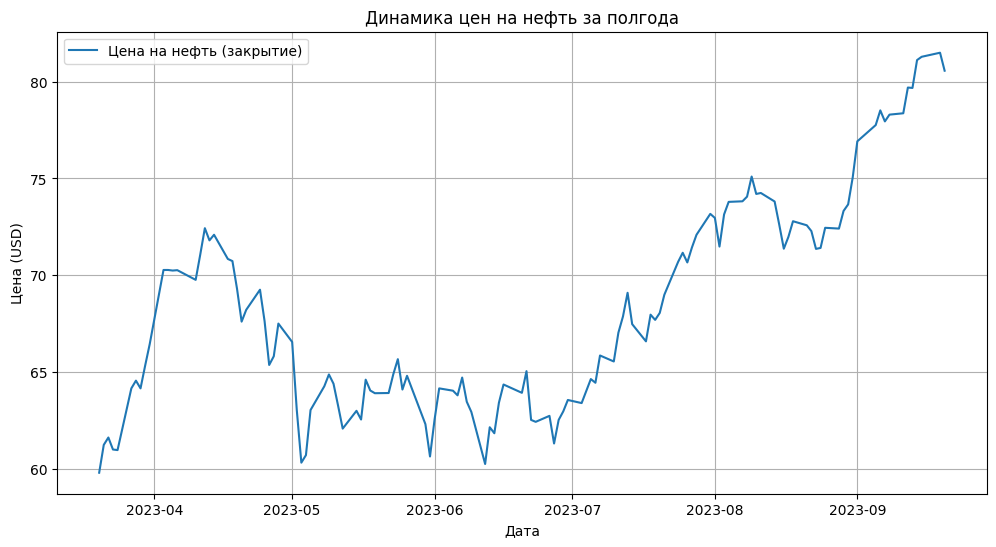

In [7]:
plt.figure(figsize=(12, 6))
plt.plot(oil_data.index, oil_data['Close'], label='Цена на нефть (закрытие)')
plt.title('Динамика цен на нефть за полгода')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Экспоненциальное сглаживание

In [31]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error 
import pandas as pd

In [32]:
def print_metrics(series, forecast, model_name):
    mae_ = mean_absolute_error(series, forecast)
    rmse_ = mean_squared_error(series, forecast, squared=False)
    mape_ = mean_absolute_percentage_error(series, forecast)
    
    dict_ = {'MAE': mae_, 'RMSE': rmse_, 'MAPE': mape_}
    
    df = pd.DataFrame(dict_, index = [model_name])
    
    return(df.round(decimals = 2))  

In [16]:
train_data = oil_data['Close']

In [17]:
train_data

Date
2023-03-20 00:00:00-04:00    59.790001
2023-03-21 00:00:00-04:00    61.230000
2023-03-22 00:00:00-04:00    61.610001
2023-03-23 00:00:00-04:00    60.990002
2023-03-24 00:00:00-04:00    60.959999
                               ...    
2023-09-14 00:00:00-04:00    81.120003
2023-09-15 00:00:00-04:00    81.290001
2023-09-18 00:00:00-04:00    81.449997
2023-09-19 00:00:00-04:00    81.500000
2023-09-20 00:00:00-04:00    80.570000
Name: Close, Length: 128, dtype: float64

In [21]:
model_exp_smoothing = SimpleExpSmoothing(train_data, initialization_method="estimated").fit()

c:\Users\Женька\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
model_exp_smoothing.model.params

{'smoothing_level': 0.9999999850987182,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 59.790186718760324,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [27]:
smoothing_level=0.9999999850987182

model_exp_smoothing = SimpleExpSmoothing(train_data, initialization_method="heuristic").fit(
    smoothing_level=smoothing_level, optimized=False
)

c:\Users\Женька\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


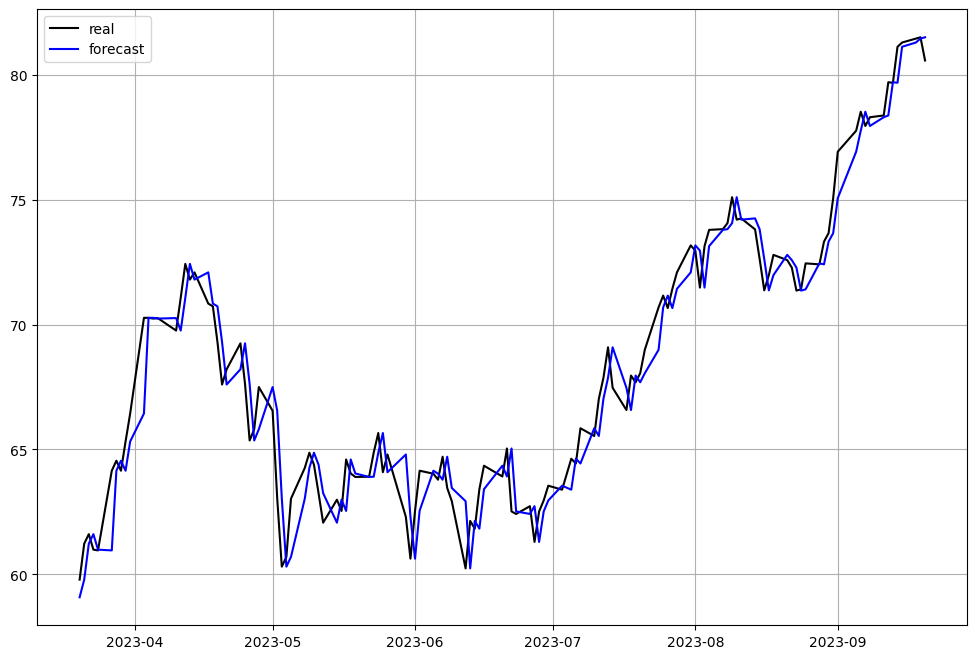

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(train_data,  color="black", label="real")
plt.plot(model_exp_smoothing.fittedvalues, color="blue", label="forecast")
plt.grid()
plt.legend()
plt.show()

In [33]:
print_metrics(train_data, model_exp_smoothing.fittedvalues, 'Простое экспоненциальное сглаживание')

,MAE,RMSE,MAPE
Простое экспоненциальное сглаживание,0.94,1.21,0.01
